## Readings
[12.2](https://inferentialthinking.com/chapters/12/2/Causality.html)
[12.3](https://inferentialthinking.com/chapters/12/3/Deflategate.html)

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter("ignore")

## Review

Hosted at https://pollev.com/jeremysanchez.

## New material

In [2]:
back_pain = Table.read_table('bta.csv')
back_pain.sample(5, with_replacement = False)

Group,Result
Control,1
Treatment,0
Control,0
Control,0
Control,0


In [3]:
back_pain.pivot('Result', 'Group')

Group,0.0,1.0
Control,14,2
Treatment,6,9


In [4]:
back_pain.group('Group')

Group,count
Control,16
Treatment,15


In [5]:
back_pain.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


**Discussion** [2 min] - Questions in slides!

In [6]:
means_array = back_pain.group('Group', np.average).column('Result average')
means_array

array([ 0.125,  0.6  ])

In [7]:
observed_difference = abs(means_array.item(1)-means_array.item(0))
observed_difference

0.475

In [8]:
def simulated_abs_difference(table, group_label, numeric_label, function):

    ## does all of the above in a function for control groups
    """
    Takes: 
       - name of table
       - column label of numerical variable
       - column label of categorical variable
       - statistic to be calculated (as a function)
       
    Returns: Difference in statistics of the two groups
    """
    shuffled_group = table.select(group_label).sample(with_replacement=False)
    simulated_table = Table().with_columns(group_label, shuffled_group.column(0),
                                        numeric_label, table.column(numeric_label))
    
    stats_array = simulated_table.group(group_label, function).column(1)
    
    
    return abs(stats_array.item(1)-stats_array.item(0))

In [9]:
simulated_abs_difference(back_pain, 'Group', 'Result', np.average)

0.08750000000000002

In [10]:
simulated_differences = make_array()
simulations = 2500

In [11]:
for i in np.arange(simulations):
    one_difference = simulated_abs_difference(back_pain, 
                                              'Group', 
                                              'Result', 
                                              np.average)
    simulated_differences = np.append(simulated_differences, one_difference)

Our observed difference of 0.475 is rare given what we would expect under the null!


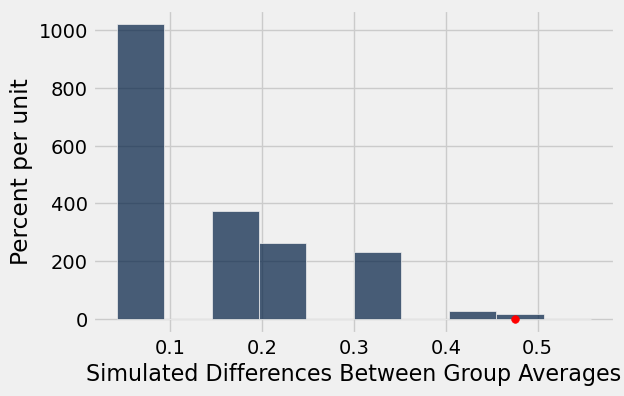

In [12]:
Table().with_column('Simulated Differences Between Group Averages', 
                    simulated_differences).hist()
plots.scatter(observed_difference, -0.001, color='red', s=30);
print('Our observed difference of ' + str(observed_difference) + ' is rare given what we would expect under the null!')

____

In [13]:
observed_difference

0.475

In [14]:
simulated_differences

array([ 0.17083333,  0.21666667,  0.04166667, ...,  0.17083333,
        0.17083333,  0.04166667])

In [16]:
p_value = np.average(simulated_differences >= observed_difference)
p_value

0.0083999999999999995